In [7]:
import numpy as np
import pandas as pd

In [8]:
from sklearn.datasets import load_boston

boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = lr.predict(X_test)

In [13]:
check_test = pd.DataFrame({'y_test': y_test['price'], 
                           'y_pred': y_pred.flatten()}, 
                          columns=['y_test', 'y_pred'])

In [14]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.71122600574849

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [18]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [19]:
y_pred = model.predict(X_test)

In [20]:
r2_score(y_test, y_pred)

0.8749965273218174

In [ ]:
## Модель RandomForestRegressor работает лучше, оценка R2 ближе к 1.

In [21]:
?RandomForestRegressor

In [22]:
model.feature_importances_

array([0.03211748, 0.00154999, 0.0070941 , 0.0011488 , 0.01436832,
       0.40270459, 0.01424477, 0.06403265, 0.00496762, 0.01169177,
       0.01808961, 0.0123114 , 0.41567892])

In [23]:
model.feature_importances_.sum()

0.9999999999999994

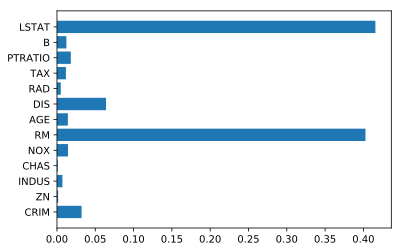

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.barh(X_test.columns, model.feature_importances_.flatten());

In [28]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [32]:
df = pd.read_csv('..\lesson06\creditcard.csv', sep = ',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [41]:
pd.options.display.max_columns = 100

In [52]:
X = df.drop('Class', axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, stratify=y)

In [54]:
parameters = [{'n_estimators': [10, 15], 
               'max_features': np.arange(3, 5),
               'max_depth': np.arange(4, 7)}]

clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100), 
                   param_grid=parameters,
                   scoring='roc_auc',
                   cv=3)

clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 15], 'max_features': array([3, 4]), 'max_depth': array([4, 5, 6])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [55]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [64]:
y_pred_proba = clf.predict_proba(X_test)[:,1]

In [69]:
from sklearn.metrics import roc_auc_score

## AUC для тестовых данных

roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

In [78]:
## AUC для тренировочных данных

y_pred_proba_train = clf.predict_proba(X_train)[:,1]

roc_auc_score(y_train, y_pred_proba_train)

0.9703527882554751

In [71]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label = 1)

Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

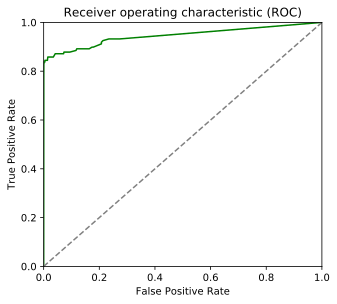

In [76]:
from pylab import rcParams

rcParams['figure.figsize'] = 5, 4.5
plt.plot(fpr, tpr, color='green', label='ROC curve')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')

In [79]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_train, pos_label = 1)

Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

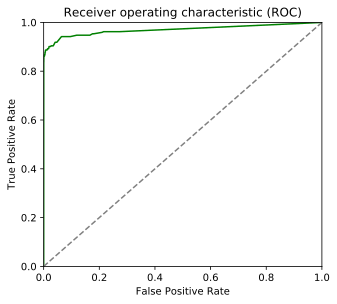

In [80]:
rcParams['figure.figsize'] = 5, 4.5
plt.plot(fpr, tpr, color='green', label='ROC curve')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')